<a href="https://colab.research.google.com/github/nuha-95/CSE422-Artificial-Intelligence/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
loan_data = pd.read_csv('/content/drive/MyDrive/CSE422-Project/Loan_Prediction.csv')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm

%pwd

loan_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.shape

(614, 13)

<ipython-input-28-1734a5d37a0c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_data.corr()


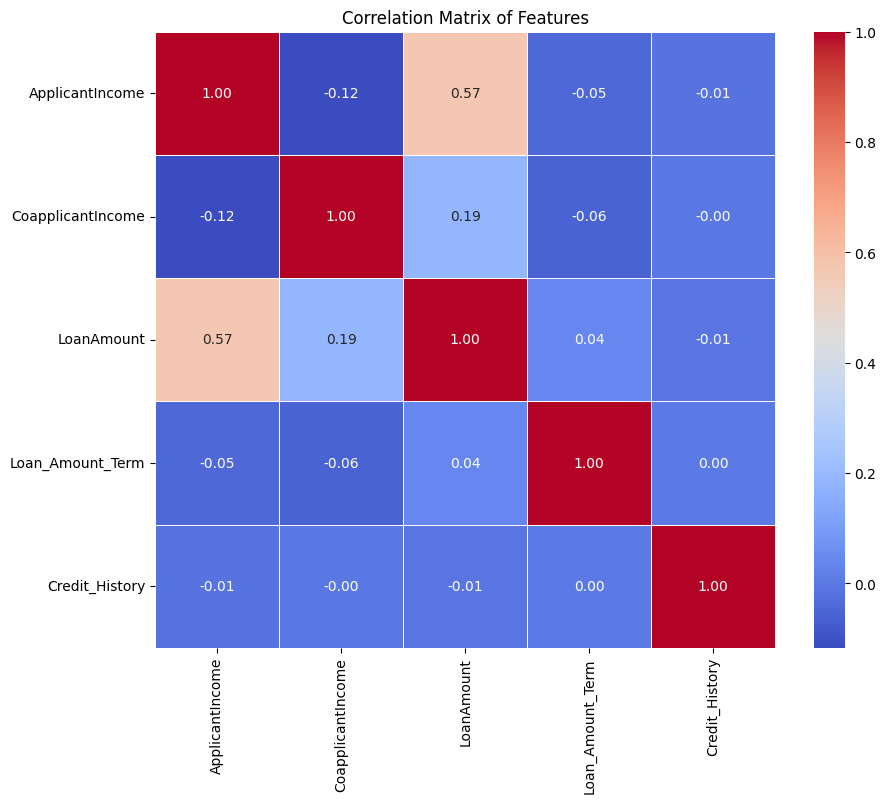

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming loan_data contains your dataset
correlation_matrix = loan_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#checking missing values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
r,c=loan_data.shape
for col in loan_data.columns:
  print(f'Percentage of missing values in {col} column is {(loan_data[col].isnull().sum()/r)*100:.2f}%')


Percentage of missing values in Loan_ID column is 0.00%
Percentage of missing values in Gender column is 2.12%
Percentage of missing values in Married column is 0.49%
Percentage of missing values in Dependents column is 2.44%
Percentage of missing values in Education column is 0.00%
Percentage of missing values in Self_Employed column is 5.21%
Percentage of missing values in ApplicantIncome column is 0.00%
Percentage of missing values in CoapplicantIncome column is 0.00%
Percentage of missing values in LoanAmount column is 3.58%
Percentage of missing values in Loan_Amount_Term column is 2.28%
Percentage of missing values in Credit_History column is 8.14%
Percentage of missing values in Property_Area column is 0.00%
Percentage of missing values in Loan_Status column is 0.00%


Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

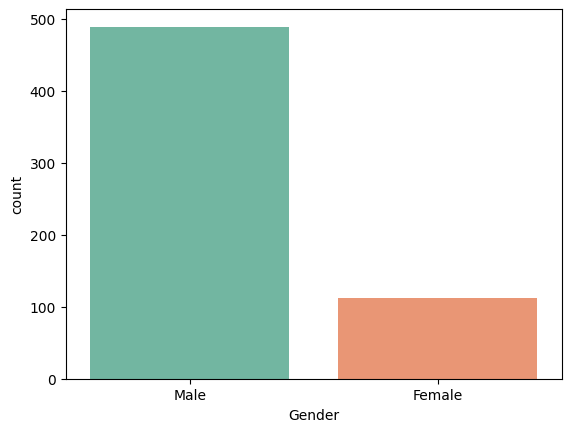

In [ ]:
print("Number of people who take a loan group by gender :")
print(loan_data['Gender'].value_counts())
sns.countplot(x='Gender', data=loan_data, palette = 'Set2')

Number of people who take a loan group by marital status :
Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

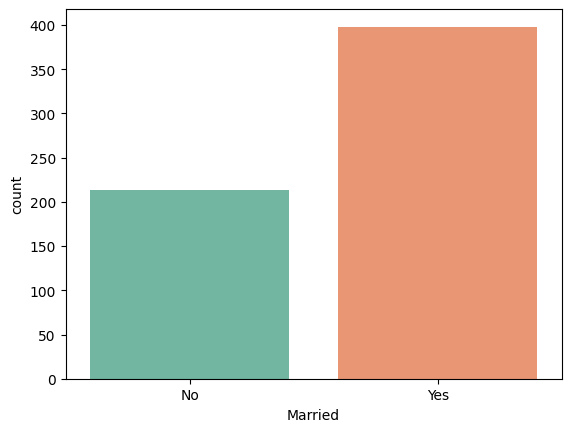

In [ ]:
print("Number of people who take a loan group by marital status :")
print(loan_data['Married'].value_counts())
sns.countplot(x='Married', data=loan_data, palette = 'Set2')

Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

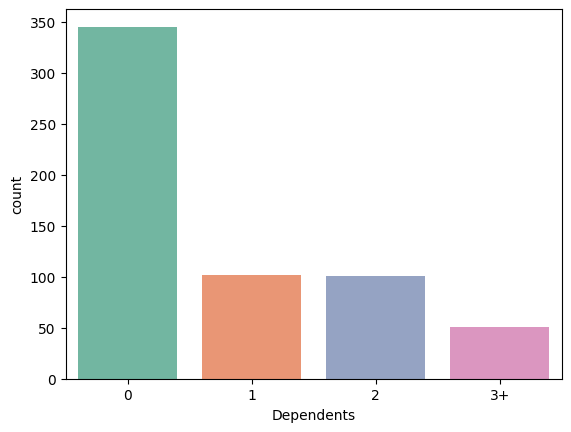

In [ ]:
print("Number of people who take a loan group by dependents :")
print(loan_data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=loan_data, palette = 'Set2')

Number of people who take a loan group by self employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

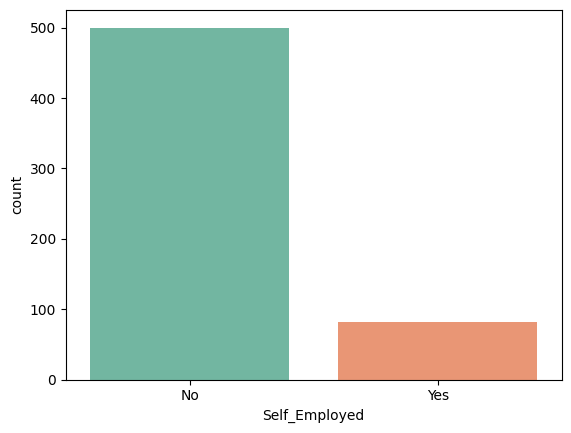

In [ ]:
print("Number of people who take a loan group by self employed :")
print(loan_data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=loan_data, palette = 'Set2')

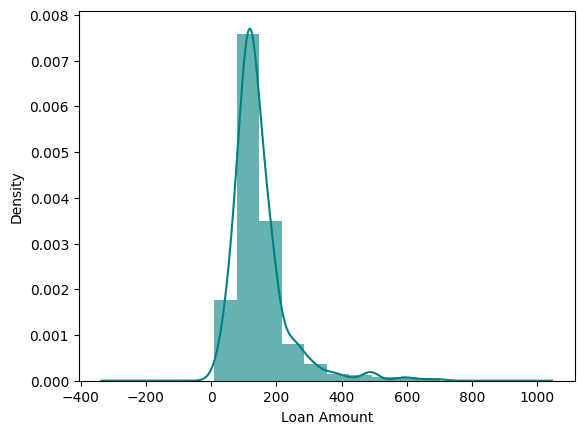

In [ ]:
ax = loan_data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
loan_data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

Number of people who take a loan group by loan amount term :
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

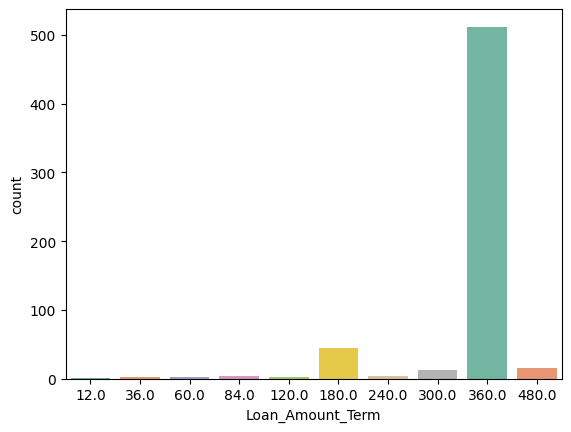

In [ ]:
print("Number of people who take a loan group by loan amount term :")
print(loan_data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=loan_data, palette = 'Set2')

Number of people who take a loan group by credit history :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

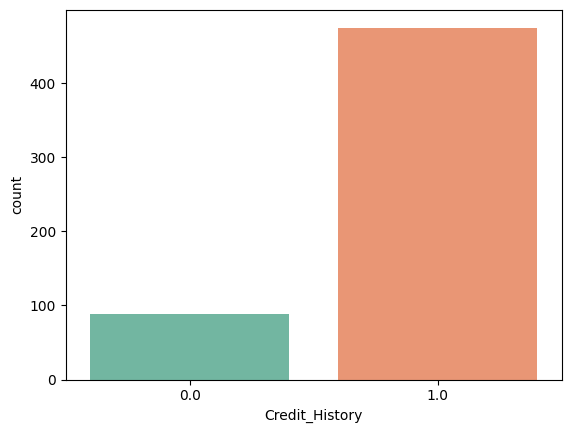

In [ ]:
print("Number of people who take a loan group by credit history :")
print(loan_data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=loan_data, palette = 'Set2')

In [ ]:
target=loan_data['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets with random_state=0
X_train, X_test, y_train, y_test = train_test_split(loan_data, target, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(429, 13)
(185, 13)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Separate feature and target variables
x = loan_data.drop(['Loan_Status'], axis=1)
y = loan_data['Loan_Status']

# Handling missing values and encoding categorical variables in a pipeline
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline with preprocessing and model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=10))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier - Accuracy on the test set: {accuracy_rf*100:.2f}%")



RandomForestClassifier - Accuracy on the test set: 78.92%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Pipeline with preprocessing and Decision Tree Classifier
clf_decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', DecisionTreeClassifier())])

clf_decision_tree.fit(X_train, y_train)

y_pred_dt = clf_decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree - Accuracy on the test set: {accuracy_dt*100:.2f}%")

# Pipeline with preprocessing and SVM Classifier
clf_svm = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM - Accuracy on the test set: {accuracy_dt*100:.2f}%")

# Pipeline with preprocessing and KNN Classifier
clf_knn = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', KNeighborsClassifier())])

clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN - Accuracy on the test set: {accuracy_knn*100:.2f}%")




Decision Tree - Accuracy on the test set: 80.00%
SVM - Accuracy on the test set: 80.00%
KNN - Accuracy on the test set: 78.92%


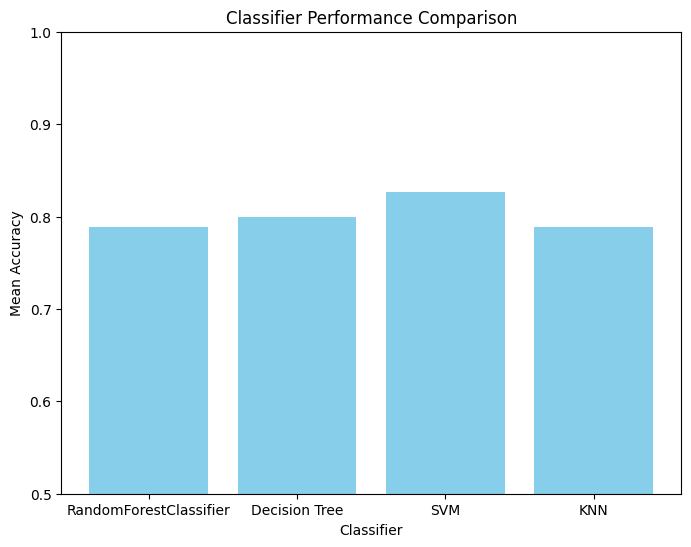

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean accuracy scores for each classifier
mean_scores = [accuracy_rf.mean(),accuracy_dt.mean(), accuracy_svm.mean(), accuracy_knn.mean()]

# List of classifier names
classifiers = ['RandomForestClassifier','Decision Tree', 'SVM', 'KNN']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(classifiers, mean_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Mean Accuracy')
plt.title('Classifier Performance Comparison')
plt.ylim(0.5, 1.0)
plt.show()



In [ ]:
from sklearn.metrics import classification_report

report_rf = classification_report(y_test, y_pred)
print("RandomForest Classification Report:")
print(report_rf)

# Calculate and display precision, recall, and other metrics for Decision Tree Classifier
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(report_dt)

# Calculate and display precision, recall, and other metrics for SVM Classifier
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(report_svm)

# Calculate and display precision, recall, and other metrics for KNN Classifier
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:")
print(report_knn)


RandomForest Classification Report:
              precision    recall  f1-score   support

           N       0.65      0.51      0.57        51
           Y       0.83      0.90      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.70      0.72       185
weighted avg       0.78      0.79      0.78       185

Decision Tree Classification Report:
              precision    recall  f1-score   support

           N       0.67      0.55      0.60        51
           Y       0.84      0.90      0.87       134

    accuracy                           0.80       185
   macro avg       0.75      0.72      0.73       185
weighted avg       0.79      0.80      0.79       185

SVM Classification Report:
              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86     

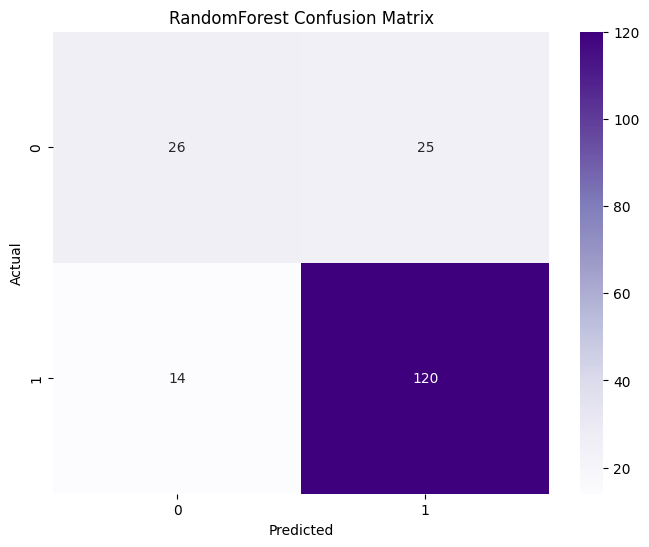

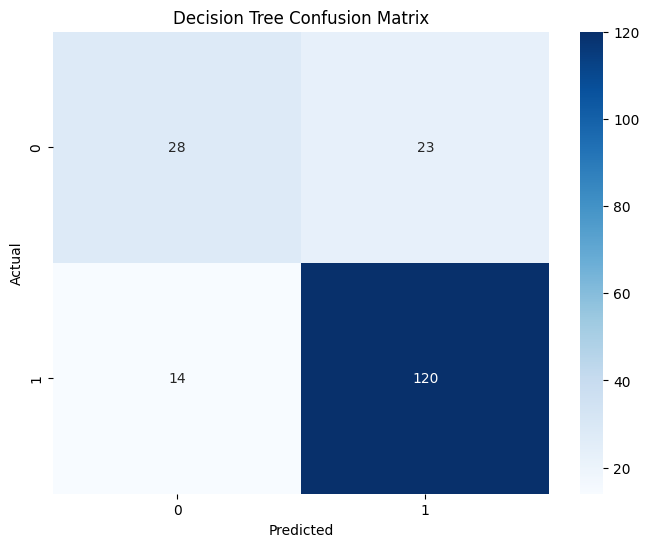

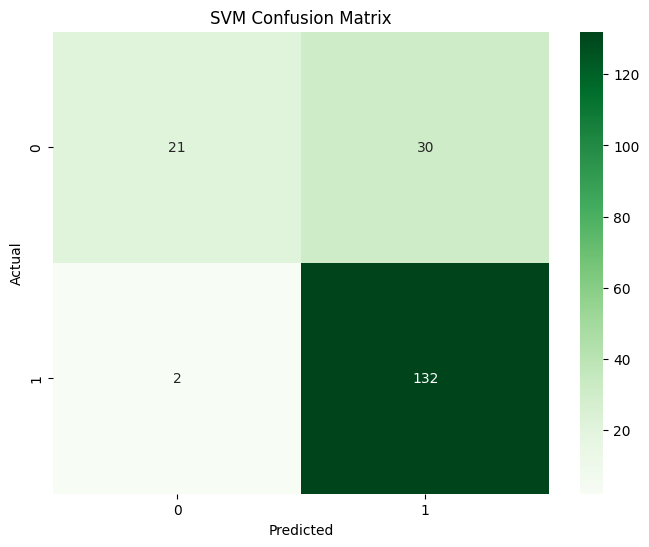

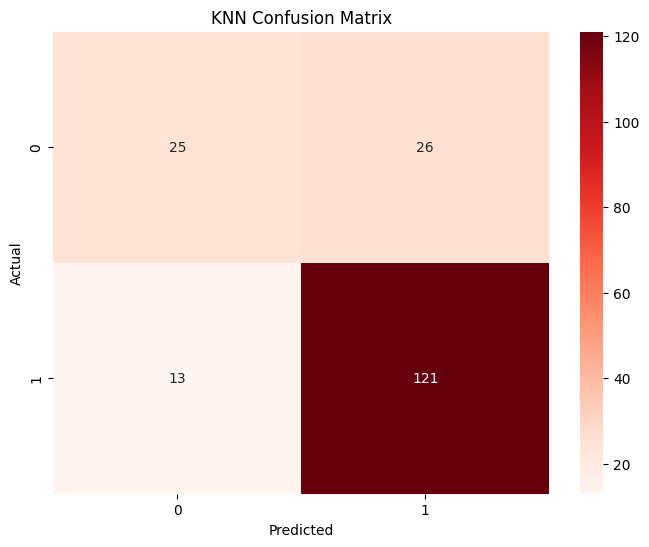

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Purples')
plt.title("RandomForest Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and display confusion matrix for Decision Tree Classifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and display confusion matrix for SVM Classifier
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and display confusion matrix for KNN Classifier
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds')
plt.title("KNN Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
